# D-02 EDA — Migrants by Last Residence & Duration (Census 2011)

**File:** DS-0000-D02-MDDS.XLSX  
**What this has:** For each state, migrants from each last-residence location broken down by how long they've been there.

Main issue with this table is that every (state, last-residence) pair appears 9 times due to two TRU columns — Origin_TRU (where they came from: Total/Rural/Urban) and Dest_TRU (where they settled: Total/Rural/Urban). Keeping all 9 rows per pair would inflate every count by up to 9x. We only want the Total×Total row.

There are also summary/subtotal rows in LastResidence (e.g. "Total", "Last residence within India", continent groupings) that need to come out.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({
    'figure.dpi': 120,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titlesize': 13,
    'axes.labelsize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
})

INPUT_FILE = "DS-0000-D02-MDDS.XLSX"
SKIP_ROWS  = 5

COL_NAMES = [
    'TableName','StateCode','DistrictCode','AreaName',
    'LastResidence','Origin_TRU','Dest_TRU',
    'Persons_Total','Males_Total','Females_Total',
    'Persons_LT1yr','Males_LT1yr','Females_LT1yr',
    'Persons_1to4yr','Males_1to4yr','Females_1to4yr',
    'Persons_5to9yr','Males_5to9yr','Females_5to9yr',
    'Persons_10to19yr','Males_10to19yr','Females_10to19yr',
    'Persons_20plusyr','Males_20plusyr','Females_20plusyr',
    'Persons_DurNS','Males_DurNS','Females_DurNS',
]

df_raw = pd.read_excel(INPUT_FILE, skiprows=SKIP_ROWS, header=None)
df_raw.columns = COL_NAMES[:df_raw.shape[1]]
print(f"Raw shape: {df_raw.shape}")
df_raw.head(8)


Raw shape: (18038, 28)


,TableName,StateCode,DistrictCode,AreaName,LastResidence,Origin_TRU,Dest_TRU,Persons_Total,Males_Total,Females_Total,...,Females_5to9yr,Persons_10to19yr,Males_10to19yr,Females_10to19yr,Persons_20plusyr,Males_20plusyr,Females_20plusyr,Persons_DurNS,Males_DurNS,Females_DurNS
0,D0302,0.0,0.0,INDIA,Total,Total,Total,455787621.0,146145967.0,309641654.0,...,42003406.0,94713188.0,25979400.0,68733788.0,146421501.0,35148111.0,111273390.0,72744662.0,37504094.0,35240568.0
1,D0302,0.0,0.0,INDIA,Total,Total,Rural,278203361.0,64703974.0,213499387.0,...,27634786.0,57728193.0,9894435.0,47833758.0,98989422.0,14186384.0,84803038.0,42243760.0,21690294.0,20553466.0
2,D0302,0.0,0.0,INDIA,Total,Total,Urban,177584260.0,81441993.0,96142267.0,...,14368620.0,36984995.0,16084965.0,20900030.0,47432079.0,20961727.0,26470352.0,30500902.0,15813800.0,14687102.0
3,D0302,0.0,0.0,INDIA,Last residence within India,Total,Total,449917418.0,143467652.0,306449766.0,...,41713367.0,93880994.0,25665354.0,68215640.0,143269910.0,33680536.0,109589374.0,72106077.0,37161079.0,34944998.0
4,D0302,0.0,0.0,INDIA,Last residence within India,Total,Rural,275416210.0,63588085.0,211828125.0,...,27477989.0,57311368.0,9778290.0,47533078.0,97476022.0,13554521.0,83921501.0,41931933.0,21517920.0,20414013.0
5,D0302,0.0,0.0,INDIA,Last residence within India,Total,Urban,174501208.0,79879567.0,94621641.0,...,14235378.0,36569626.0,15887064.0,20682562.0,45793888.0,20126015.0,25667873.0,30174144.0,15643159.0,14530985.0
6,D0302,0.0,0.0,INDIA,Last residence within India,Rural,Total,291960709.0,72214492.0,219746217.0,...,30468101.0,68370418.0,15878227.0,52492191.0,111704816.0,21796759.0,89908057.0,18349575.0,7361565.0,10988010.0
7,D0302,0.0,0.0,INDIA,Last residence within India,Rural,Rural,213759232.0,36841723.0,176917509.0,...,23519971.0,49302557.0,7398481.0,41904076.0,87340066.0,11074343.0,76265723.0,13504271.0,5073544.0,8430727.0


## 1. Raw snapshot

In [2]:
print(df_raw.dtypes)
print()
print(df_raw.isnull().sum())
print()
print(f"Duplicate rows: {df_raw.duplicated().sum()}")


TableName            object
StateCode           float64
DistrictCode        float64
AreaName             object
LastResidence        object
Origin_TRU           object
Dest_TRU             object
Persons_Total       float64
Males_Total         float64
Females_Total       float64
Persons_LT1yr       float64
Males_LT1yr         float64
Females_LT1yr       float64
Persons_1to4yr      float64
Males_1to4yr        float64
Females_1to4yr      float64
Persons_5to9yr      float64
Males_5to9yr        float64
Females_5to9yr      float64
Persons_10to19yr    float64
Males_10to19yr      float64
Females_10to19yr    float64
Persons_20plusyr    float64
Males_20plusyr      float64
Females_20plusyr    float64
Persons_DurNS       float64
Males_DurNS         float64
Females_DurNS       float64
dtype: object

TableName           1
StateCode           2
DistrictCode        2
AreaName            2
LastResidence       2
Origin_TRU          2
Dest_TRU            2
Persons_Total       2
Males_Total         2
Fem

In [3]:
num_cols = [c for c in df_raw.columns if c.startswith(('Persons_','Males_','Females_'))]
df_raw[num_cols].describe()


,Persons_Total,Males_Total,Females_Total,Persons_LT1yr,Males_LT1yr,Females_LT1yr,Persons_1to4yr,Males_1to4yr,Females_1to4yr,Persons_5to9yr,...,Females_5to9yr,Persons_10to19yr,Males_10to19yr,Females_10to19yr,Persons_20plusyr,Males_20plusyr,Females_20plusyr,Persons_DurNS,Males_DurNS,Females_DurNS
count,1.803600e+04,1.803600e+04,1.803600e+04,1.803600e+04,1.803600e+04,1.803600e+04,1.803600e+04,1.803600e+04,1.803600e+04,1.803600e+04,...,1.803600e+04,1.803600e+04,1.803600e+04,1.803600e+04,1.803600e+04,1.803600e+04,1.803600e+04,1.803600e+04,1.803600e+04,1.803600e+04
mean,6.683301e+05,2.077846e+05,4.605455e+05,2.656469e+04,1.178885e+04,1.477584e+04,9.698861e+04,3.231370e+04,6.467490e+04,9.183885e+04,...,6.385083e+04,1.441390e+05,3.947061e+04,1.046684e+05,2.212728e+05,5.256826e+04,1.687045e+05,8.752623e+04,4.365517e+04,4.387106e+04
std,9.009188e+06,2.687847e+06,6.451836e+06,3.324466e+05,1.432492e+05,1.906346e+05,1.246758e+06,3.998509e+05,8.641570e+05,1.200132e+06,...,8.701706e+05,1.925452e+06,4.951230e+05,1.463663e+06,3.065836e+06,6.584995e+05,2.464222e+06,1.349875e+06,6.940761e+05,6.584029e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.700000e+01,9.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.980000e+02,1.520000e+02,1.350000e+02,3.400000e+01,1.900000e+01,1.400000e+01,8.200000e+01,4.000000e+01,3.900000e+01,3.800000e+01,...,1.800000e+01,4.000000e+01,1.850000e+01,2.000000e+01,4.000000e+01,1.900000e+01,2.000000e+01,2.300000e+01,1.200000e+01,1.000000e+01
75%,6.813500e+03,3.272250e+03,3.378250e+03,6.240000e+02,3.600000e+02,2.520000e+02,1.509250e+03,7.120000e+02,7.412500e+02,9.225000e+02,...,4.872500e+02,1.095250e+03,4.600000e+02,6.062500e+02,1.368250e+03,5.600000e+02,7.302500e+02,5.490000e+02,2.920000e+02,2.472500e+02
max,4.557876e+08,1.461460e+08,3.096417e+08,1.758604e+07,7.805017e+06,9.781027e+06,6.389325e+07,2.128378e+07,4.260948e+07,6.042898e+07,...,4.200341e+07,9.471319e+07,2.597940e+07,6.873379e+07,1.464215e+08,3.514811e+07,1.112734e+08,7.274466e+07,3.750409e+07,3.524057e+07


## 2. Checking the grouping columns

In [4]:
print("Origin_TRU:")
print(df_raw['Origin_TRU'].value_counts().to_string())
print()
print("Dest_TRU:")
print(df_raw['Dest_TRU'].value_counts().to_string())


Origin_TRU:
Origin_TRU
Total                   5184
Rural                   4320
Urban                   4320
Elsewhere                540
Bangladesh               108
Afganistan               108
Bhutan                   108
China                    108
Iran                     108
Indonesia                108
Japan                    108
Kuwait                   108
Malaysia                 108
Iraq                     108
Mayanmar                 108
Nepal                    108
Pakistan                 108
Saudi Arabia             108
Singapore                108
Sri Lanka                108
Turkey                   108
Maldives                 108
United Arab Emirates     108
Kazakstan                108
Vietnam                  108
France                   108
Germany                  108
Portugal                 108
UK                       108
Kenya                    108
Mauritius                108
Nigeria                  108
Uganda                   108
Zambia              

In [5]:
SUMMARY_LR = {
    'Total','Last residence within India',
    'Within the state of enumeration but outside the place of enumeration',
    'Elsewhere in the district of enumeration',
    'In other districts of the state of enumeration',
    'States in India beyond the state of enumeration',
    'Last residence outside India',
    'Countries in Asia beyond India','Countries in Europe',
    'Countries in Africa','Countries in the Americas',
    'Countries in Oceania','Elsewhere','Unclassifiable'
}

print("LastResidence values:")
for v in sorted(df_raw['LastResidence'].dropna().astype(str).str.strip().unique()):
    note = "  <- subtotal" if v in SUMMARY_LR else ""
    print(f"  {v}{note}")


LastResidence values:
  Andaman & Nicobar Islands
  Andhra Pradesh
  Arunachal Pradesh
  Assam
  Bihar
  Chandigarh
  Chhattisgarh
  Countries in Africa  <- subtotal
  Countries in Asia beyond India  <- subtotal
  Countries in Europe  <- subtotal
  Countries in Oceania  <- subtotal
  Countries in the Americas  <- subtotal
  Dadra & Nagar Haveli
  Daman & Diu
  Elsewhere in the district of enumeration  <- subtotal
  Goa
  Gujarat
  Haryana
  Himachal Pradesh
  In other districts of the state of enumeration  <- subtotal
  Jammu & Kashmir
  Jharkhand
  Karnataka
  Kerala
  Lakshadweep
  Last residence outside India  <- subtotal
  Last residence within India  <- subtotal
  Madhya Pradesh
  Maharashtra
  Manipur
  Meghalaya
  Mizoram
  NCT of Delhi
  Nagaland
  Odisha
  Puducherry
  Punjab
  Rajasthan
  Sikkim
  States in India beyond the state of enumeration  <- subtotal
  Tamil Nadu
  Total  <- subtotal
  Tripura
  Unclassifiable  <- subtotal
  Uttar Pradesh
  Uttarakhand
  West Bengal
  

## 3. Verifying the TRU hierarchy

The `LastResidence='Total'` row only has `Origin_TRU=Total` — no Rural/Urban breakdown at that level. To see all 9 combinations we need to look at `LastResidence='Last residence within India'`.

Key thing to check: does Total-Rural + Total-Urban = Total×Total? (Dest_TRU split should be exact.) The Origin_TRU split won't add up perfectly because ~52M within-state movers don't have a Rural/Urban origin tag.

In [6]:
india_outer = df_raw[
    (df_raw['AreaName'].astype(str).str.strip() == 'INDIA') &
    (df_raw['LastResidence'].astype(str).str.strip() == 'Total') &
    (df_raw['Origin_TRU'].astype(str).str.strip() == 'Total')
].copy()
india_outer['Persons_Total'] = pd.to_numeric(india_outer['Persons_Total'], errors='coerce')

def gv_outer(dest):
    row = india_outer[india_outer['Dest_TRU'].astype(str).str.strip() == dest]
    return float(row['Persons_Total'].values[0]) if len(row) else None

tt = gv_outer('Total')
tr = gv_outer('Rural')
tu = gv_outer('Urban')

print("Outer 'Total' row — Dest_TRU split:")
print(f"  Total-Total (our row) : {tt:>15,.0f}")
print(f"  Total-Rural           : {tr:>15,.0f}")
print(f"  Total-Urban           : {tu:>15,.0f}")
print(f"  Rural + Urban         : {tr+tu:>15,.0f}  matches = {abs(tt-tr-tu) < 1}")
print()

india_lriw = df_raw[
    (df_raw['AreaName'].astype(str).str.strip() == 'INDIA') &
    (df_raw['LastResidence'].astype(str).str.strip() == 'Last residence within India')
].copy()
india_lriw['Persons_Total'] = pd.to_numeric(india_lriw['Persons_Total'], errors='coerce')

def gv9(origin, dest):
    row = india_lriw[
        (india_lriw['Origin_TRU'].astype(str).str.strip() == origin) &
        (india_lriw['Dest_TRU'].astype(str).str.strip()   == dest)
    ]
    return float(row['Persons_Total'].values[0]) if len(row) else None

tt9 = gv9('Total','Total')
tr9, tu9 = gv9('Total','Rural'), gv9('Total','Urban')
rt9, ut9 = gv9('Rural','Total'), gv9('Urban','Total')

print("Full 9-way grid (Last residence within India):")
print(f"  Total x Total         : {tt9:>15,.0f}")
print()
print(f"  Dest split — Rural    : {tr9:>15,.0f}")
print(f"             — Urban    : {tu9:>15,.0f}")
print(f"             sum        : {tr9+tu9:>15,.0f}  matches = {abs(tt9-tr9-tu9)<1}")
print()
print(f"  Origin split — Rural  : {rt9:>15,.0f}")
print(f"              — Urban   : {ut9:>15,.0f}")
print(f"              sum       : {rt9+ut9:>15,.0f}  shortfall {tt9-rt9-ut9:,.0f} (unclassified within-state)")
print()
print("All 9 rows:")
print(india_lriw[['Origin_TRU','Dest_TRU','Persons_Total']].sort_values(['Origin_TRU','Dest_TRU']).to_string(index=False))


Outer 'Total' row — Dest_TRU split:
  Total-Total (our row) :     455,787,621
  Total-Rural           :     278,203,361
  Total-Urban           :     177,584,260
  Rural + Urban         :     455,787,621  matches = True

Full 9-way grid (Last residence within India):
  Total x Total         :     449,917,418

  Dest split — Rural    :     275,416,210
             — Urban    :     174,501,208
             sum        :     449,917,418  matches = True

  Origin split — Rural  :     291,960,709
              — Urban   :     105,075,338
              sum       :     397,036,047  shortfall 52,881,371 (unclassified within-state)

All 9 rows:
Origin_TRU Dest_TRU  Persons_Total
     Rural    Rural    213759232.0
     Rural    Total    291960709.0
     Rural    Urban     78201477.0
     Total    Rural    275416210.0
     Total    Total    449917418.0
     Total    Urban    174501208.0
     Urban    Rural     26975221.0
     Urban    Total    105075338.0
     Urban    Urban     78100117.0


## 4. Cleaning

In [7]:
df = df_raw.copy()

# keep only Origin_TRU=Total, Dest_TRU=Total
df = df[
    (df['Origin_TRU'].astype(str).str.strip() == 'Total') &
    (df['Dest_TRU'].astype(str).str.strip()   == 'Total')
]

df = df.dropna(subset=['AreaName','LastResidence'])
df = df[df['AreaName'].astype(str).str.strip() != 'INDIA']

SUMMARY_LR = {
    'Total','Last residence within India',
    'Within the state of enumeration but outside the place of enumeration',
    'Elsewhere in the district of enumeration',
    'In other districts of the state of enumeration',
    'States in India beyond the state of enumeration',
    'Last residence outside India',
    'Countries in Asia beyond India','Countries in Europe',
    'Countries in Africa','Countries in the Americas',
    'Countries in Oceania','Elsewhere','Unclassifiable',
}
df = df[~df['LastResidence'].astype(str).str.strip().isin(SUMMARY_LR)]

num_cols = [c for c in df.columns if c.startswith(('Persons_','Males_','Females_'))]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

df = df[df['Persons_Total'] > 0]

df['AreaName']     = df['AreaName'].astype(str).str.replace(r'^State\s*-\s*', '', regex=True).str.replace(r'\s*\(\d+\)\s*$', '', regex=True).str.strip()
df['LastResidence'] = df['LastResidence'].astype(str).str.strip()

print(f"Rows: {len(df)}")
print(f"States: {df['AreaName'].nunique()},  LastResidence categories: {df['LastResidence'].nunique()}")


Rows: 1173


States: 35,  LastResidence categories: 35


## 5. Validation checks

In [8]:
dupes = df.duplicated(subset=['AreaName','LastResidence'])
print(f"Duplicate (state, last-residence) pairs: {dupes.sum()}")

mf_bad = (abs(df['Persons_Total'] - df['Males_Total'] - df['Females_Total']) > 1).sum()
print(f"M+F != Total: {mf_bad}")

dur_cols = ['Persons_LT1yr','Persons_1to4yr','Persons_5to9yr',
            'Persons_10to19yr','Persons_20plusyr','Persons_DurNS']
dur_bad = (abs(df['Persons_Total'] - df[dur_cols].sum(axis=1)) > 1).sum()
print(f"Duration bands don't sum to total: {dur_bad}")

rps = df.groupby('AreaName').size()
print(f"Rows per state — min {rps.min()}, max {rps.max()}, mean {rps.mean():.1f}")


Duplicate (state, last-residence) pairs: 0
M+F != Total: 0
Duration bands don't sum to total: 0
Rows per state — min 30, max 34, mean 33.5


## 6. EDA

In [9]:
print(f"States / UTs      : {df['AreaName'].nunique()}")
print(f"LastResidence cats: {df['LastResidence'].nunique()}")
print(f"Total rows        : {len(df):,}")
print(f"Total migrants    : {df['Persons_Total'].sum():,}")


States / UTs      : 35
LastResidence cats: 35
Total rows        : 1,173
Total migrants    : 54,264,749


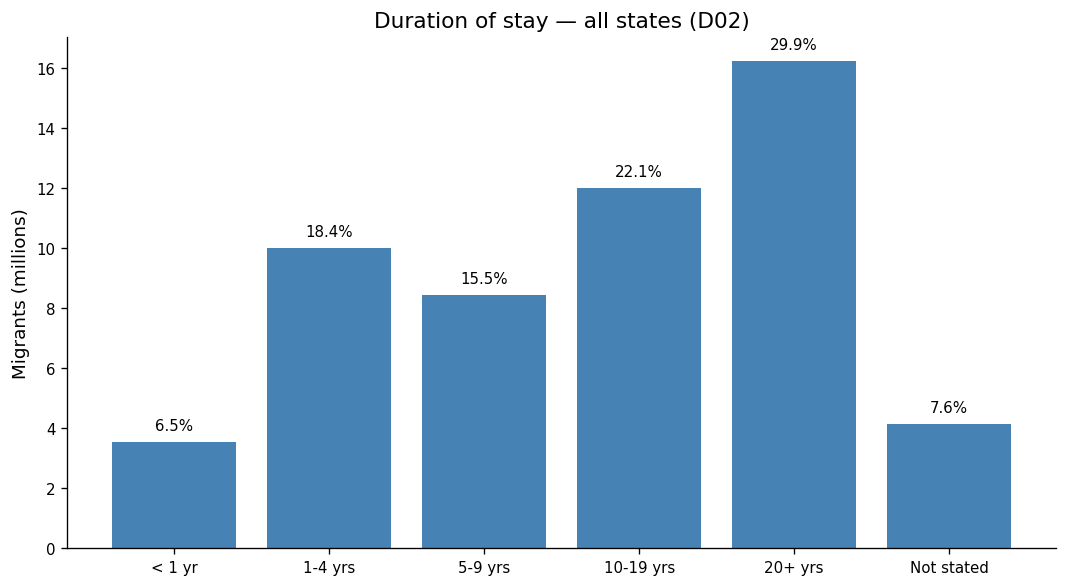

In [10]:
dur_cols   = ['Persons_LT1yr','Persons_1to4yr','Persons_5to9yr',
              'Persons_10to19yr','Persons_20plusyr','Persons_DurNS']
dur_labels = ['< 1 yr','1-4 yrs','5-9 yrs','10-19 yrs','20+ yrs','Not stated']
dur_totals = df[dur_cols].sum()
grand      = dur_totals.sum()

fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.bar(dur_labels, dur_totals.values / 1e6, color='steelblue')
for bar, val in zip(bars, dur_totals.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
            f"{val/grand*100:.1f}%", ha='center', va='bottom', fontsize=9)
ax.set_ylabel('Migrants (millions)')
ax.set_title('Duration of stay — all states (D02)')
plt.tight_layout()
plt.show()


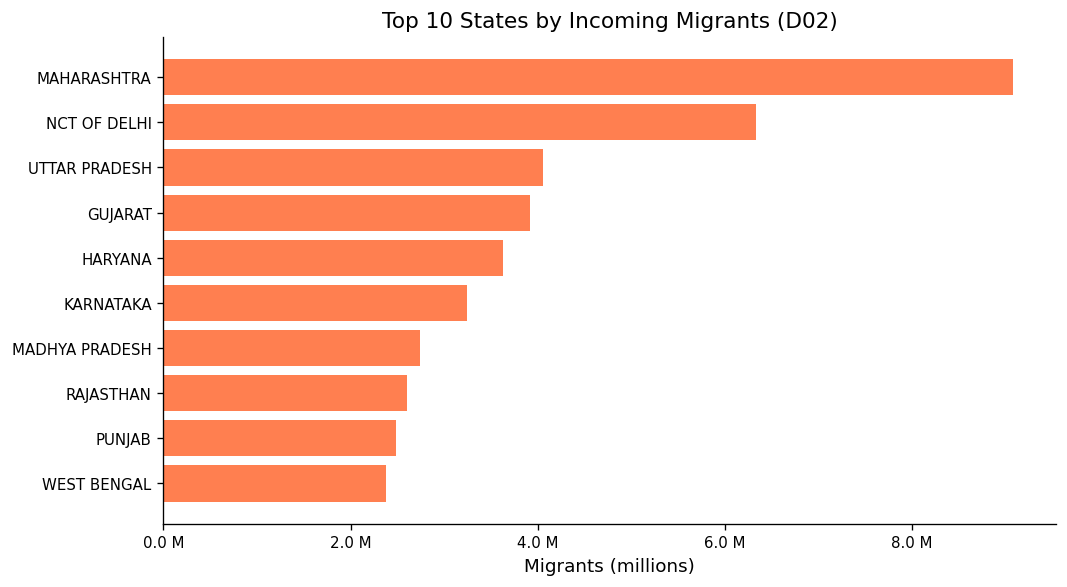

In [11]:
top_dest = df.groupby('AreaName')['Persons_Total'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(top_dest.index[::-1], top_dest.values[::-1] / 1e6, color='coral')
ax.set_xlabel('Migrants (millions)')
ax.set_title('Top 10 States by Incoming Migrants (D02)')
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f M'))
plt.tight_layout()
plt.show()


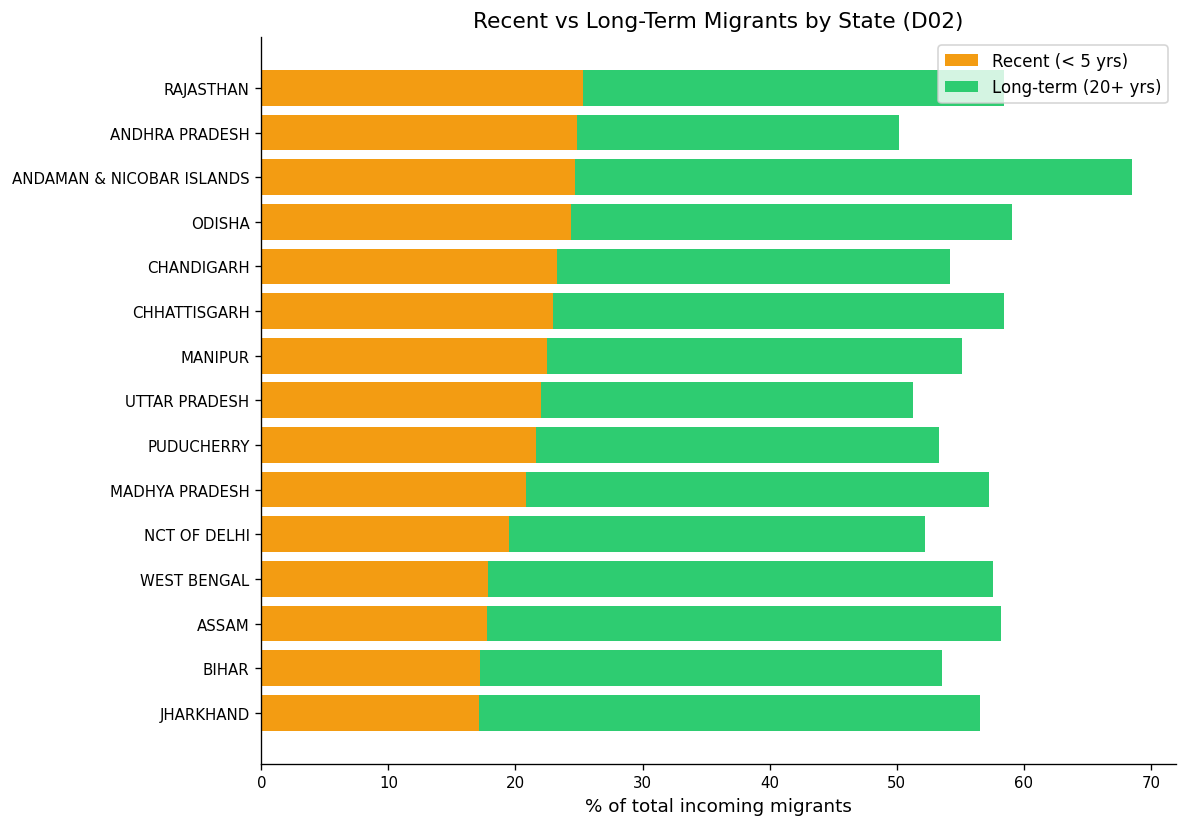

In [12]:
df['Recent']   = df['Persons_LT1yr'] + df['Persons_1to4yr']
df['LongTerm'] = df['Persons_20plusyr']

state_rl = df.groupby('AreaName')[['Recent','LongTerm','Persons_Total']].sum()
state_rl['RecentPct']   = state_rl['Recent']   / state_rl['Persons_Total'] * 100
state_rl['LongTermPct'] = state_rl['LongTerm']  / state_rl['Persons_Total'] * 100
state_rl = state_rl.sort_values('RecentPct').head(15)

fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(state_rl.index, state_rl['RecentPct'],  label='Recent (< 5 yrs)',   color='#f39c12')
ax.barh(state_rl.index, state_rl['LongTermPct'], label='Long-term (20+ yrs)', color='#2ecc71', left=state_rl['RecentPct'])
ax.set_xlabel('% of total incoming migrants')
ax.set_title('Recent vs Long-Term Migrants by State (D02)')
ax.legend()
plt.tight_layout()
plt.show()


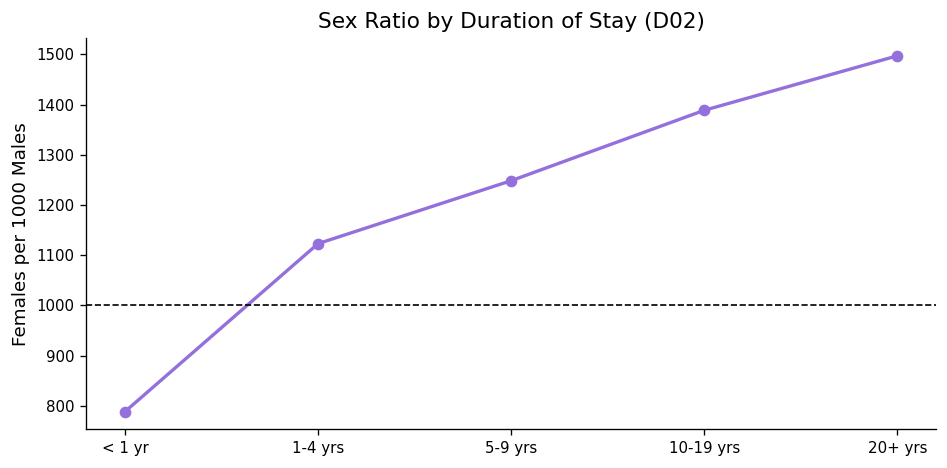

  < 1 yr      : 788 F per 1000 M
  1-4 yrs     : 1123 F per 1000 M
  5-9 yrs     : 1248 F per 1000 M
  10-19 yrs   : 1389 F per 1000 M
  20+ yrs     : 1497 F per 1000 M


In [13]:
dur_pairs = [
    ('Males_LT1yr',    'Females_LT1yr',    '< 1 yr'),
    ('Males_1to4yr',   'Females_1to4yr',   '1-4 yrs'),
    ('Males_5to9yr',   'Females_5to9yr',   '5-9 yrs'),
    ('Males_10to19yr', 'Females_10to19yr', '10-19 yrs'),
    ('Males_20plusyr', 'Females_20plusyr', '20+ yrs'),
]
labels = [p[2] for p in dur_pairs]
sr     = [df[p[1]].sum() / df[p[0]].sum() * 1000 for p in dur_pairs]

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(labels, sr, marker='o', color='mediumpurple', linewidth=2)
ax.axhline(1000, color='black', linestyle='--', linewidth=1)
ax.set_ylabel('Females per 1000 Males')
ax.set_title('Sex Ratio by Duration of Stay (D02)')
plt.tight_layout()
plt.show()

for l, v in zip(labels, sr):
    print(f"  {l:<12}: {v:.0f} F per 1000 M")


## 7. Export

In [14]:
keep = ['AreaName','LastResidence',
        'Persons_Total','Males_Total','Females_Total',
        'Persons_LT1yr','Persons_1to4yr','Persons_5to9yr',
        'Persons_10to19yr','Persons_20plusyr','Persons_DurNS']
df_final = df[[c for c in keep if c in df.columns]].reset_index(drop=True)

print(f"Shape  : {df_final.shape}")
print(f"Nulls  : {df_final.isnull().sum().sum()}")
print(f"Total  : {df_final['Persons_Total'].sum():,}")

df_final.to_csv("D02_cleaned.csv", index=False)
print("Saved -> D02_cleaned.csv")
df_final.head(10)


Shape  : (1173, 11)
Nulls  : 0
Total  : 54,264,749
Saved -> D02_cleaned.csv


,AreaName,LastResidence,Persons_Total,Males_Total,Females_Total,Persons_LT1yr,Persons_1to4yr,Persons_5to9yr,Persons_10to19yr,Persons_20plusyr,Persons_DurNS
0,JAMMU & KASHMIR,Himachal Pradesh,8609,2688,5921,401,1391,815,1195,3340,1467
1,JAMMU & KASHMIR,Punjab,43938,12318,31620,2489,6535,4848,8011,17112,4943
2,JAMMU & KASHMIR,Chandigarh,611,249,362,61,196,90,81,95,88
3,JAMMU & KASHMIR,Uttarakhand,3180,1633,1547,428,1139,220,222,291,880
4,JAMMU & KASHMIR,Haryana,5987,2744,3243,791,1717,448,553,914,1564
5,JAMMU & KASHMIR,NCT of Delhi,5269,2316,2953,388,1629,669,752,1116,715
6,JAMMU & KASHMIR,Rajasthan,6079,3190,2889,1069,2097,338,407,417,1751
7,JAMMU & KASHMIR,Uttar Pradesh,20190,11520,8670,2879,6085,1991,2065,1765,5405
8,JAMMU & KASHMIR,Bihar,13200,6998,6202,1659,3670,1935,2277,1253,2406
9,JAMMU & KASHMIR,Sikkim,109,52,57,9,46,11,13,12,18
